In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

Tarea 1: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

[0.396484375, 0.4296875, 0.3984375, 0.390625, 0.392578125, 0.388671875, 0.4140625] [6, 12, 15, 20, 21, 88, 100]


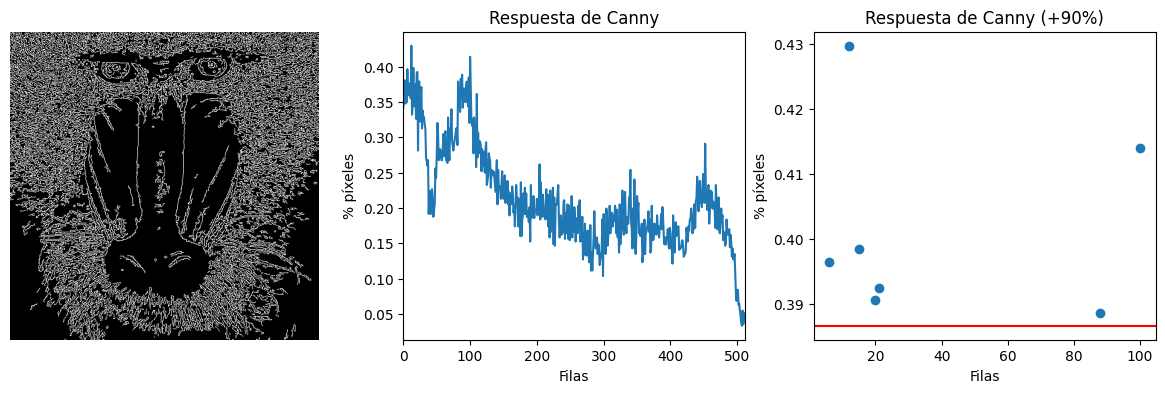

In [3]:
# El contenido de la imagen resultado de Canny, son valores 0 o 255
# Cuenta el número de píxeles blancos (255) por fila
# Suma los valores de los pixeles por fila
# Row
img = cv2.imread('mandril.jpg') 
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Convierte el array de N arrays de 1 elemento en un array de N elementos
row_counts = row_counts.reshape((len(row_counts)))
# rows
rows = row_counts / (255 * canny.shape[0])

# Guardamos en 'maxfil' el valor máximo de blancos en para filas
maxfil = rows.max()
# Creamos un array para guardar las filas cuyo valor de blancos sea mayor que el 90% de 'maxfil'
max_rows_values = []
max_rows_indexes = []
for i in range(len(rows)):
    if rows[i] >= 0.9*maxfil:
        max_rows_values.append(float(rows[i]))
        max_rows_indexes.append(i)
print(max_rows_values, max_rows_indexes)

# Muestra Canny
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(15, 4))
ax1.set_axis_off()
ax2.set_title("Canny")
ax1.imshow(canny, cmap='gray') 

# Muestra píxeles blancos por filas
ax2.set_title("Respuesta de Canny")
ax2.set_xlabel("Filas")
ax2.set_ylabel("% píxeles")
ax2.plot(rows)
# Rango en x definido por las filas
ax2.set_xlim([0, len(row_counts)])

# Muestra valor de píxeles blancos mayores que el 90% de maxfil
ax3.set_title("Respuesta de Canny (+90%)")
ax3.set_xlabel("Filas")
ax3.set_ylabel("% píxeles")
ax3.axhline(maxfil*0.9, color='red')
x = np.array(max_rows_indexes)
y = np.array(max_rows_values)
ax3.plot(x, y, 'o')

Tarea 2: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

[0.349609375] [288]
[0.302734375, 0.291015625, 0.291015625, 0.294921875, 0.296875, 0.314453125, 0.30078125] [3, 4, 20, 51, 81, 82, 83]


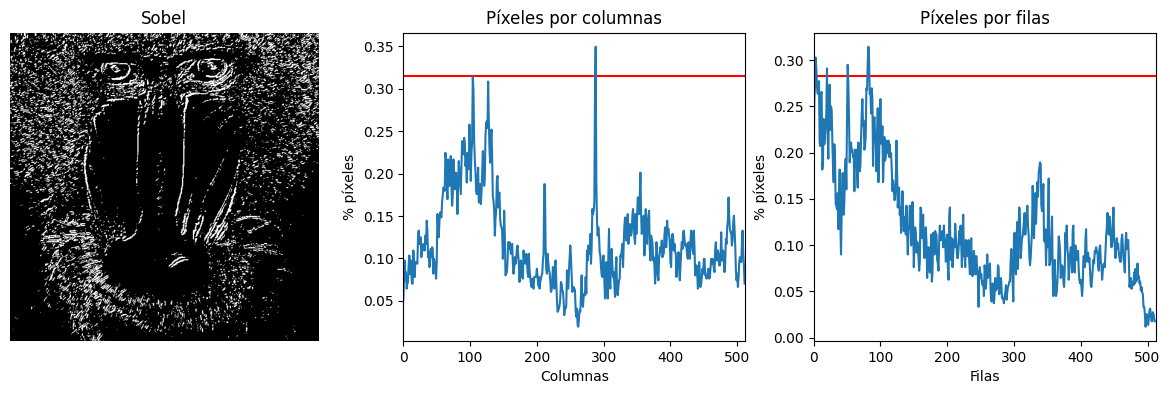

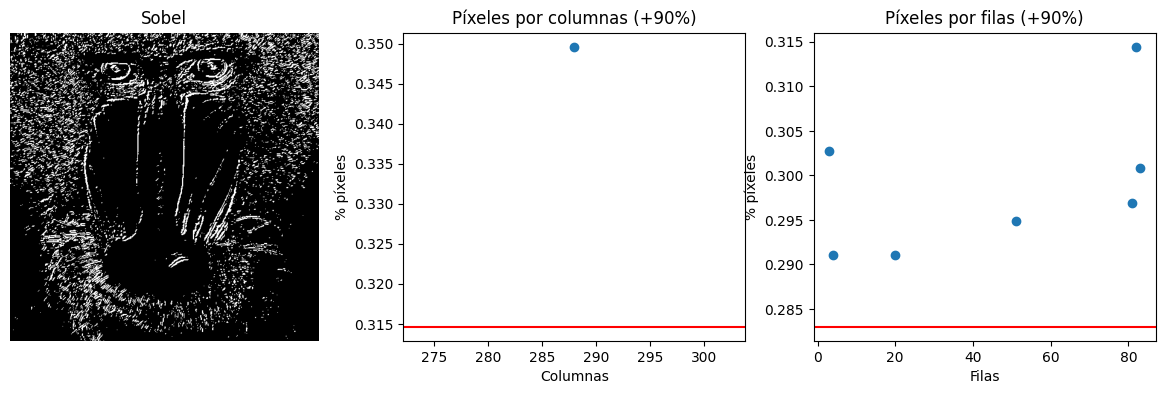

In [4]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

valor_umbral = 130

_, imagenUmbralizada = cv2.threshold(cv2.convertScaleAbs(sobel), valor_umbral, 255, cv2.THRESH_BINARY)

# Mostramos Sobel
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(15, 4))
ax1.set_axis_off()
ax1.set_title("Sobel")
ax1.imshow(imagenUmbralizada, cmap='gray')

col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts / (255 * imagenUmbralizada.shape[1])
cols = cols[0]

row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = row_counts.reshape((len(row_counts)))
rows = row_counts / (255 * imagenUmbralizada.shape[0])

maxcol = cols.max()
maxfil = rows.max()

# Mostramos la cuenta de píxeles para las columnas
ax2.set_title("Píxeles por columnas")
ax2.set_xlabel("Columnas")
ax2.set_ylabel("% píxeles")
ax2.axhline(maxcol*0.9, color="red")
ax2.plot(cols)
# Rango en x definido por las columnas
ax2.set_xlim([0, len(cols)])

# Mostramos la cuenta de píxeles para las filas
ax3.set_title("Píxeles por filas")
ax3.set_xlabel("Filas")
ax3.set_ylabel("% píxeles")
ax3.axhline(maxfil*0.9, color="red")
ax3.plot(rows)
ax3.set_xlim([0, len(rows)])

# Creamos un array para guardar las filas cuyo valor de blancos sea mayor que el 90% de 'maxfil'
max_cols_values = []
max_cols_indexes = []
for i in range(len(cols)):
    if cols[i] >= 0.9*maxcol:
        max_cols_values.append(float(cols[i]))
        max_cols_indexes.append(i)

max_rows_values = []
max_rows_indexes = []
for i in range(len(rows)):
    if rows[i] >= 0.9*maxfil:
        max_rows_values.append(float(rows[i]))
        max_rows_indexes.append(i)

print(max_cols_values, max_cols_indexes)
print(max_rows_values, max_rows_indexes)

# Mostramos los gráficos para la cuenta por encima del 90%
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(15, 4))
# Falta añadir líneas en las filas y columnas con más del 90%
ax1.set_axis_off()
ax1.set_title("Sobel")
ax1.imshow(imagenUmbralizada, cmap='gray')

# Columnas
ax2.set_title("Píxeles por columnas (+90%)")
ax2.set_xlabel("Columnas")
ax2.set_ylabel("% píxeles")
ax2.axhline(maxcol*0.9, color='red')
x = np.array(max_cols_indexes)
y = np.array(max_cols_values)
ax2.plot(x, y, 'o')

# Filas
ax3.set_title("Píxeles por filas (+90%)")
ax3.set_xlabel("Filas")
ax3.set_ylabel("% píxeles")
ax3.axhline(maxfil*0.9, color='red')
x = np.array(max_rows_indexes)
y = np.array(max_rows_values)
ax3.plot(x, y, 'o')




In [2]:
import cv2

vid = cv2.VideoCapture(0)
modo = 0

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if not ret:
        break
    
    # Convertir a escala de grises
    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if modo == 0:
        # Normal
        salida = frame.copy()
    
    elif modo == 1:
        # Umbralización
        _, salida = cv2.threshold(gris, 130, 255, cv2.THRESH_BINARY)
    
    elif modo == 2:
        # Sobel
        ggris = cv2.GaussianBlur(gris, (3, 3), 0)
        sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)
        sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)
        sobel = cv2.convertScaleAbs(cv2.add(sobelx, sobely))
        salida = sobel
    
    elif modo == 3:
        # Pop art
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        frame[:,:,0] = b
        frame[:,:,1] = 255 - r
        frame[:,:,2] = 255 - g

        salida = frame 

    
    # Mostrar la ventana
    cv2.imshow("Resultado", salida)

    key = cv2.waitKey(20)
    # Detenemos pulsando ESC
    if key == 27:
        break
    # Cambiamos entre modos, si pulsa d avanzo a la derecha
    # Si pulso a retrocedo
    elif key == ord('d'):
        modo = (modo + 1) % 4 
    elif key == ord('a'):
        modo = (modo - 1) % 4

# Liberar el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


In [3]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

video_capture = cv2.VideoCapture(0)

def detectar_caras(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x+w, y+h), (0, 255, 0), 4)
    return faces

while True:
    ret, frame = video_capture.read()
    if not ret:
        break
    faces = detectar_caras(frame)
    cv2.imshow('Video', frame)
    if cv2.waitKey(20) == 27:
        break

# Liberar el objeto de captura
video_capture.release()
# Destruye ventanas
cv2.destroyAllWindows()